# Data Understanding

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = '/Users/This Pc/Downloads/hotel_rec/'

info_hotel = pd.read_csv(DATA_PATH+'hotel_with_id.csv')
hotel_rating = pd.read_csv(DATA_PATH+'hotel_rating.csv')
userhotel = pd.read_csv(DATA_PATH+'userhotel.csv')


In [4]:
info_hotel.sample(5)

,Hotel_Id,Hotel_Name,Hotel_Address,Hotel_Descriptions,Hotel_City,Hotel_Star,Hotel_Price,Hotel_Rating
17,6492,Grand Vista Hanoi,"146 Giảng Võ, Ba Đình, Hà Nội, Việt Nam",Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,5,NaN,"8,6"
24,8053,La Santé Hotel & Spa,"42 Chau Long street, Ba Dinh district, Quận Ba...","Nằm gần Hồ Trúc Bạch và Hồ Tây, La Sante Hotel...",Hà Nội,4,NaN,"8,1"
8,8169,Classy Boutique Hotel,"21 P. Hàng Cá, Hàng Bồ, Hoàn Kiếm, Hà Nội",Classy Boutique Hotel với vị trí thuận lợi nằm...,Hà Nội,3,NaN,"8,9"
6,6377,Paradise Suites Nguyen Khuyen,"1/115 P. Nguyễn Khuyến, Kim Mã, Ba Đình",Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,4,790875.0,9
10,8057,My Moon Hotel Hanoi,"59 Cua Dong, Hoan Kiem, Quận Hoàn Kiếm","Mỗi phòng đều có khu vực tiếp khách, TV truyền...",Hà Nội,3,NaN,"8,8"


In [5]:
hotel_rating.sample(5)

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review
238,14777,9934,8,20/01/2024,"The first and second time I came here, I felt ..."
181,14501,8101,8,NaN,NaN
47,14688,8057,8,NaN,NaN
252,14369,6024,8,24/03/2024,"Một khách sạn tuyệt vời ở khu vực Phố Cổ, địa ..."
146,14265,6492,8,NaN,NaN


In [6]:
userhotel.sample(5)

,Hotel_User_Id,Hotel_User_Location,Hotel_User_Name
82,14797,Hà Giang,Bảo
25,14530,Đà Nẵng,Hoang
74,14735,Nam Định,Roosinah
100,14687,Hồ Chí Minh,Sơn
70,14593,Quảng Nam,Mai


In [23]:
print(f"Number of hotel in the datasets : {len(info_hotel.Hotel_Id.unique())}")
print(f"Number of users : {len(userhotel.Hotel_User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(hotel_rating.Hotel_User_Id)}")

Number of hotel in the datasets : 27
Number of users : 130
The number of ratings given by the user to the dataset : 289


# Exploratory Data Analysis

In [24]:
info_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel_Id            27 non-null     int64  
 1   Hotel_Name          27 non-null     object 
 2   Hotel_Address       27 non-null     object 
 3   Hotel_Descriptions  27 non-null     object 
 4   Hotel_City          27 non-null     object 
 5   Hotel_Star          27 non-null     int64  
 6   Hotel_Price         8 non-null      float64
 7   Hotel_Rating        27 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.8+ KB


In [25]:
info_hotel.isnull().sum()

Hotel_Id               0
Hotel_Name             0
Hotel_Address          0
Hotel_Descriptions     0
Hotel_City             0
Hotel_Star             0
Hotel_Price           19
Hotel_Rating           0
dtype: int64

In [26]:
hotel_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hotel_User_Id           289 non-null    int64  
 1   Hotel_Id                289 non-null    int64  
 2   Hotel_User_Rating       289 non-null    float32
 3   Hotel_User_Review_Date  140 non-null    object 
 4   Hotel_User_Review       124 non-null    object 
 5   hotel_user_id           289 non-null    int64  
 6   hotel_id                289 non-null    int64  
dtypes: float32(1), int64(4), object(2)
memory usage: 14.8+ KB


In [27]:
hotel_rating.isnull().sum()

Hotel_User_Id               0
Hotel_Id                    0
Hotel_User_Rating           0
Hotel_User_Review_Date    149
Hotel_User_Review         165
hotel_user_id               0
hotel_id                    0
dtype: int64

In [28]:
userhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Hotel_User_Id        135 non-null    int64 
 1   Hotel_User_Location  135 non-null    object
 2   Hotel_User_Name      135 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [29]:
userhotel.isnull().sum()

Hotel_User_Id          0
Hotel_User_Location    0
Hotel_User_Name        0
dtype: int64

In [30]:
info_hotel.Hotel_Descriptions.unique()

array(['Nằm tại vị trí thuận tiện ở trung tâm Hà Nội, Ha Noi Memory Central Hotel And Spa cách Ô Quan Chưởng 2 phút đi bộ và Nhà hát múa rối Thăng Long 700 m. Khách sạn 3 sao này cung cấp dịch vụ phòng, quầy lễ tân 24 giờ và Wi-Fi miễn phí. Chỗ đậu xe riêng có thể được sắp xếp với một khoản phụ phí. Khách sạn sẽ cung cấp cho khách các phòng được trang bị điều hòa có bàn làm việc, ấm đun nước, minibar, két an toàn, TV màn hình phẳng và phòng tắm riêng với vòi xịt/chậu rửa vệ sinh. Các căn có tủ quần áo. Các điểm tham quan nổi tiếng gần Ha Noi Memory Central Hotel And Spa bao gồm Hồ Hoàn Kiếm, Tràng Tiền Plaza và Nhà hát Lớn Hà Nội. Sân bay gần nhất là Sân bay Quốc tế Nội Bài, cách chỗ nghỉ 23 km.',
       'Nằm tại vị trí thuận tiện ở trung tâm Hà Nội, cung cấp các phòng có điều hòa, sân hiên, Wi-Fi miễn phí và nhà hàng. Khách sạn 3 sao này có quầy lễ tân 24 giờ. Khách sạn có phòng gia đình. Tất cả các phòng có bàn làm việc. Phòng nào cũng có phòng tắm riêng với đồ vệ sinh cá nhân mi

# Data Preprocessing

In [31]:
import numpy as np

hotel_all = np.concatenate((
    info_hotel.Hotel_Id.unique(),
    hotel_rating.Hotel_Id.unique()
))

hotel_all = np.sort(np.unique(hotel_all))

print(f"Total number of hotel: {len(hotel_all)}")

Total number of hotel: 27


In [32]:
all_hotel_rate = hotel_rating
all_hotel_rate

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review,hotel_user_id,hotel_id
0,14760,6024,9.0,11/03/2024,"Khách sạn sạch, yên tĩnh, đầy đủ tiện nghi và ...",0,0
1,14760,8101,8.0,24/04/2024,Hài lòng,0,1
2,14760,6069,8.0,20/01/2024,Khá hài lòng,0,2
3,14020,8897,8.0,06/02/2024,Tốt,1,3
4,14020,6311,7.0,01/02/2024,Good,1,4
...,...,...,...,...,...,...,...
284,14360,6108,7.0,18/02/2024,Vị trí tốt cho khách cần chỗ đỗ ô tô,126,20
285,14758,8959,8.0,03/02/2024,"P sạch sẽ, tuy nhiên hơi bất tiện vì cầu thang...",127,15
286,14296,6492,9.0,02/01/2024,NaN,33,16
287,14655,6328,8.0,16/03/2024,Well managed hotel. Decent rooms with attached...,128,26


In [33]:
all_hotel = pd.merge(all_hotel_rate,info_hotel[["Hotel_Id","Hotel_Name","Hotel_Descriptions","Hotel_City","Hotel_Star"]],on='Hotel_Id', how='left')
all_hotel

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review,hotel_user_id,hotel_id,Hotel_Name,Hotel_Descriptions,Hotel_City,Hotel_Star
0,14760,6024,9.0,11/03/2024,"Khách sạn sạch, yên tĩnh, đầy đủ tiện nghi và ...",0,0,Ha Noi Memory Central Hotel And Spa,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,4
1,14760,8101,8.0,24/04/2024,Hài lòng,0,1,TK123 Hanoi Hotel,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,3
2,14760,6069,8.0,20/01/2024,Khá hài lòng,0,2,Hillary Hanoi Hotel,"Tọa lạc ở Hà Nội, cách Bảo tàng dân tộc học ...",Hà Nội,4
3,14020,8897,8.0,06/02/2024,Tốt,1,3,Le Jardin Hotel Haute Couture,Le Jardin Hotel Haute Couture có tầm nhìn ra t...,Hà Nội,4
4,14020,6311,7.0,01/02/2024,Good,1,4,Sunway Hotel,Khách sạn có phòng tập thể dục với trang thiết...,Hà Nội,4
...,...,...,...,...,...,...,...,...,...,...,...
284,14360,6108,7.0,18/02/2024,Vị trí tốt cho khách cần chỗ đỗ ô tô,126,20,Serenity Diamond Hotel,Serenity Diamond Hotel tọa lạc tại Khu Phố Cổ ...,Hà Nội,3
285,14758,8959,8.0,03/02/2024,"P sạch sẽ, tuy nhiên hơi bất tiện vì cầu thang...",127,15,SOJO Hotel Ga Hanoi,"Nằm tại vị trí thuận tiện ở Hà Nội, SOJO Hot...",Hà Nội,4
286,14296,6492,9.0,02/01/2024,NaN,33,16,Grand Vista Hanoi,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,5
287,14655,6328,8.0,16/03/2024,Well managed hotel. Decent rooms with attached...,128,26,Thang Long Opera Hotel Hanoi,Thang Long Opera Hotel cung cấp chỗ nghỉ tại t...,Hà Nội,4


In [34]:
all_hotel['Hotel_city_star'] = all_hotel[['Hotel_City', 'Hotel_Star']].astype(str).agg(' '.join, axis=1)

In [35]:
all_hotel

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review,hotel_user_id,hotel_id,Hotel_Name,Hotel_Descriptions,Hotel_City,Hotel_Star,Hotel_city_star
0,14760,6024,9.0,11/03/2024,"Khách sạn sạch, yên tĩnh, đầy đủ tiện nghi và ...",0,0,Ha Noi Memory Central Hotel And Spa,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,4,Hà Nội 4
1,14760,8101,8.0,24/04/2024,Hài lòng,0,1,TK123 Hanoi Hotel,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,3,Hà Nội 3
2,14760,6069,8.0,20/01/2024,Khá hài lòng,0,2,Hillary Hanoi Hotel,"Tọa lạc ở Hà Nội, cách Bảo tàng dân tộc học ...",Hà Nội,4,Hà Nội 4
3,14020,8897,8.0,06/02/2024,Tốt,1,3,Le Jardin Hotel Haute Couture,Le Jardin Hotel Haute Couture có tầm nhìn ra t...,Hà Nội,4,Hà Nội 4
4,14020,6311,7.0,01/02/2024,Good,1,4,Sunway Hotel,Khách sạn có phòng tập thể dục với trang thiết...,Hà Nội,4,Hà Nội 4
...,...,...,...,...,...,...,...,...,...,...,...,...
284,14360,6108,7.0,18/02/2024,Vị trí tốt cho khách cần chỗ đỗ ô tô,126,20,Serenity Diamond Hotel,Serenity Diamond Hotel tọa lạc tại Khu Phố Cổ ...,Hà Nội,3,Hà Nội 3
285,14758,8959,8.0,03/02/2024,"P sạch sẽ, tuy nhiên hơi bất tiện vì cầu thang...",127,15,SOJO Hotel Ga Hanoi,"Nằm tại vị trí thuận tiện ở Hà Nội, SOJO Hot...",Hà Nội,4,Hà Nội 4
286,14296,6492,9.0,02/01/2024,NaN,33,16,Grand Vista Hanoi,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,5,Hà Nội 5
287,14655,6328,8.0,16/03/2024,Well managed hotel. Decent rooms with attached...,128,26,Thang Long Opera Hotel Hanoi,Thang Long Opera Hotel cung cấp chỗ nghỉ tại t...,Hà Nội,4,Hà Nội 4


# Data Preparation

## Missing Values

In [36]:
all_hotel.isnull().sum()

Hotel_User_Id               0
Hotel_Id                    0
Hotel_User_Rating           0
Hotel_User_Review_Date    149
Hotel_User_Review         165
hotel_user_id               0
hotel_id                    0
Hotel_Name                  0
Hotel_Descriptions          0
Hotel_City                  0
Hotel_Star                  0
Hotel_city_star             0
dtype: int64

In [37]:
preparation= all_hotel.drop_duplicates("Hotel_Id")
preparation

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review,hotel_user_id,hotel_id,Hotel_Name,Hotel_Descriptions,Hotel_City,Hotel_Star,Hotel_city_star
0,14760,6024,9.0,11/03/2024,"Khách sạn sạch, yên tĩnh, đầy đủ tiện nghi và ...",0,0,Ha Noi Memory Central Hotel And Spa,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,4,Hà Nội 4
1,14760,8101,8.0,24/04/2024,Hài lòng,0,1,TK123 Hanoi Hotel,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,3,Hà Nội 3
2,14760,6069,8.0,20/01/2024,Khá hài lòng,0,2,Hillary Hanoi Hotel,"Tọa lạc ở Hà Nội, cách Bảo tàng dân tộc học ...",Hà Nội,4,Hà Nội 4
3,14020,8897,8.0,06/02/2024,Tốt,1,3,Le Jardin Hotel Haute Couture,Le Jardin Hotel Haute Couture có tầm nhìn ra t...,Hà Nội,4,Hà Nội 4
4,14020,6311,7.0,01/02/2024,Good,1,4,Sunway Hotel,Khách sạn có phòng tập thể dục với trang thiết...,Hà Nội,4,Hà Nội 4
5,14020,7640,7.0,16/04/2024,NaN,1,5,Gloud Hotel,Gloud Hotel cung cấp chỗ nghỉ có nhà hàng và W...,Hà Nội,4,Hà Nội 4
6,14630,7503,8.0,01/01/2024,"Nhân viên vui vẻ, thân thiện",2,6,Le Parfum Apartment And Hotel,Căn hộ có TV màn hình phẳng và phòng tắm riêng...,Hà Nội,3,Hà Nội 3
7,14630,8169,8.0,26/09/2023,Trải nghiệm tốt,2,7,Classy Boutique Hotel,Classy Boutique Hotel với vị trí thuận lợi nằm...,Hà Nội,3,Hà Nội 3
8,14630,6997,8.0,17/12/2023,Nice,2,8,Eliana Signature Hanoi Hotel,Khách sạn sẽ cung cấp cho khách các phòng được...,Hà Nội,4,Hà Nội 4
11,14751,6377,7.0,NaN,NaN,3,9,Paradise Suites Nguyen Khuyen,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,4,Hà Nội 4


In [38]:
hotel_id = preparation.Hotel_Id.tolist()

hotel_name = preparation.Hotel_Name.tolist()

hotel_star = preparation.Hotel_Star.tolist()

hotel_desc = preparation.Hotel_Descriptions.tolist()

hotel_city = preparation.Hotel_City.tolist()

hotel_city_star = preparation.Hotel_city_star.tolist()

In [39]:
hotel_new = pd.DataFrame({
    "hotel_id":hotel_id,
    "hotel_name":hotel_name,
    "hotel_star":hotel_star,
    "hotel_descriptions":hotel_desc,
    "hotel_city":hotel_city,
    "hotel_city_star":hotel_city_star
})

hotel_new

,hotel_id,hotel_name,hotel_star,hotel_descriptions,hotel_city,hotel_city_star
0,6024,Ha Noi Memory Central Hotel And Spa,4,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,Hà Nội 4
1,8101,TK123 Hanoi Hotel,3,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,Hà Nội 3
2,6069,Hillary Hanoi Hotel,4,"Tọa lạc ở Hà Nội, cách Bảo tàng dân tộc học ...",Hà Nội,Hà Nội 4
3,8897,Le Jardin Hotel Haute Couture,4,Le Jardin Hotel Haute Couture có tầm nhìn ra t...,Hà Nội,Hà Nội 4
4,6311,Sunway Hotel,4,Khách sạn có phòng tập thể dục với trang thiết...,Hà Nội,Hà Nội 4
5,7640,Gloud Hotel,4,Gloud Hotel cung cấp chỗ nghỉ có nhà hàng và W...,Hà Nội,Hà Nội 4
6,7503,Le Parfum Apartment And Hotel,3,Căn hộ có TV màn hình phẳng và phòng tắm riêng...,Hà Nội,Hà Nội 3
7,8169,Classy Boutique Hotel,3,Classy Boutique Hotel với vị trí thuận lợi nằm...,Hà Nội,Hà Nội 3
8,6997,Eliana Signature Hanoi Hotel,4,Khách sạn sẽ cung cấp cho khách các phòng được...,Hà Nội,Hà Nội 4
9,6377,Paradise Suites Nguyen Khuyen,4,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,Hà Nội 4


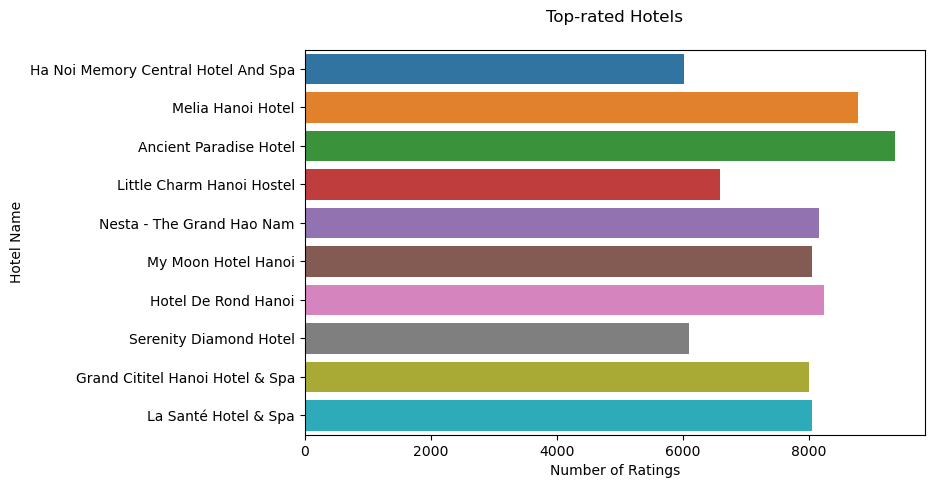

In [40]:
top_10 = hotel_new['hotel_id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, preparation[['Hotel_Id','Hotel_Name']], how='left', left_on='index', right_on='Hotel_Id')

# Create a bar plot to visualize the top-rated hotels
plt.figure(figsize=(8,5))
sns.barplot(x='index', y='Hotel_Name', data=top_10)
plt.title('Top-rated Hotels', pad=20)
plt.ylabel('Hotel Name')
plt.xlabel('Number of Ratings')
plt.show()

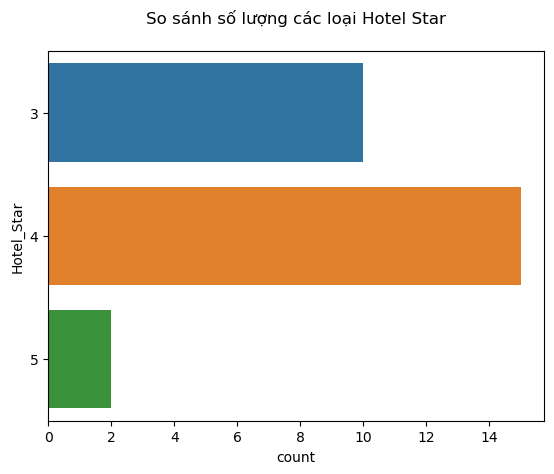

In [41]:
sns.countplot(y='Hotel_Star', data=preparation)
plt.title('So sánh số lượng các loại Hotel Star', pad=20)
plt.show()

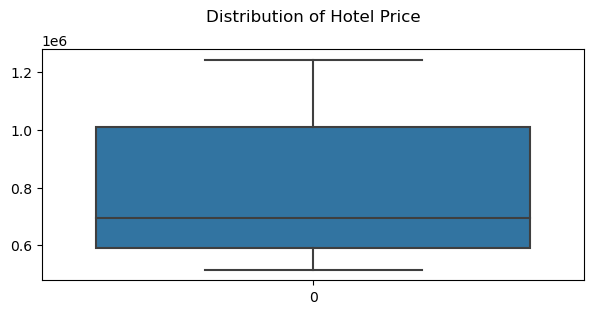

In [42]:
plt.figure(figsize=(7,3))
sns.boxplot(info_hotel['Hotel_Price'])
plt.title('Distribution of Hotel Price', pad=20)
plt.show()

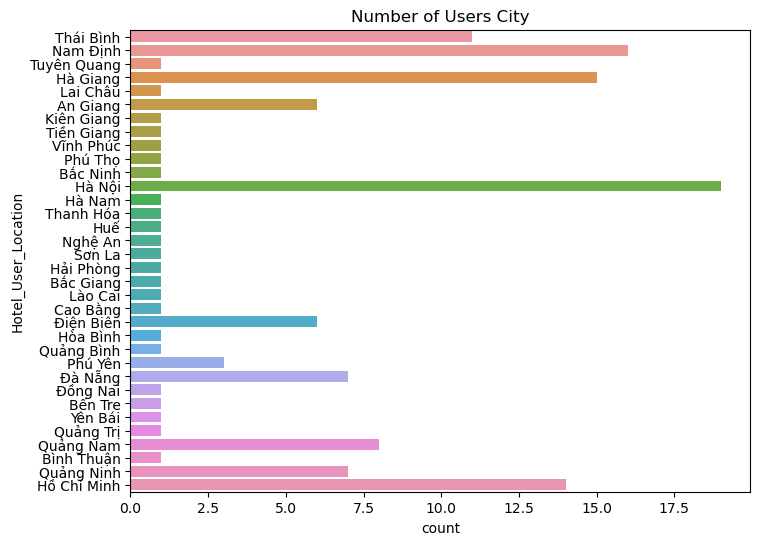

In [38]:
askot = userhotel['Hotel_User_Location'].apply(lambda x : x.split(',')[0])

# Visualization of the user's city
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of Users City')
plt.show()

# Content Based Filtering

In [39]:
data = hotel_new
data.sample(5)

,hotel_id,hotel_name,hotel_star,hotel_descriptions,hotel_city,hotel_city_star
16,6492,Grand Vista Hanoi,5,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,Hà Nội 5
10,7355,Mercury Central Hotel Hanoi,3,"Nằm cách Hồ Hoàn Kiếm xinh đẹp 2 phút đi bộ, M...",Hà Nội,Hà Nội 3
23,8160,Nesta - The Grand Hao Nam,4,Căn hộ có ban công nơi khách có thể nhìn ra kh...,Hà Nội,Hà Nội 4
20,6108,Serenity Diamond Hotel,3,Serenity Diamond Hotel tọa lạc tại Khu Phố Cổ ...,Hà Nội,Hà Nội 3
21,8246,Hotel De Rond Hanoi,4,Khách sạn cung cấp cho khách các phòng có điều...,Hà Nội,Hà Nội 4


## TF-IDF Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['hotel_descriptions'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['nằm', 'tại', 'vị', 'trí', 'thuận', 'tiện', 'trung', 'tâm', 'ha', 'nô', 'noi', 'memory', 'central', 'hotel', 'and', 'spa', 'cách', 'quan', 'chưởng', 'phút', 'đi', 'bộ', 'và', 'nhà', 'hát', 'múa', 'rối', 'thăng', 'long', '700', 'khách', 'sạn', 'sao', 'này', 'cung', 'cấp', 'dịch', 'vụ', 'phòng', 'quầy', 'lễ', 'tân', '24', 'giờ', 'wi', 'fi', 'miễn', 'phí', 'chỗ', 'đậu', 'xe', 'riêng', 'có', 'thể', 'được', 'sắp', 'xếp', 'với', 'một', 'khoản', 'phụ', 'sẽ', 'cho', 'các', 'trang', 'bị', 'điều', 'hòa', 'bàn', 'làm', 'việc', 'ấm', 'đun', 'nước', 'minibar', 'két', 'an', 'toàn', 'tv', 'màn', 'hình', 'phẳng', 'tắm', 'vòi', 'xịt', 'chậu', 'rửa', 'vệ', 'sinh', 'căn', 'tủ', 'quần', 'áo', 'điểm', 'tham', 'nổi', 'tiếng', 'gần', 'bao', 'gồm', 'hồ', 'hoàn', 'kiếm', 'tràng', 'tiền', 'plaza', 'lớn', 'hà', 'nội', 'sân', 'bay', 'nhất', 'là', 'quốc', 'tế', 'bài', 'nghỉ', '23', 'km', 'hiên', 'hàng', 'gia', 'đình', 'tất', 'cả', 'nào', 'cũng', 'đồ', 'cá', 'nhân', 'trong', 'đó', 'số', 'ban', 'côn

In [44]:
cv_matrix = cv.transform(data['hotel_descriptions']) 
 
cv_matrix.shape 

(27, 548)

In [45]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.hotel_name
).sample(5)

,nằm,tại,vị,trí,thuận,tiện,trung,tâm,ha,nô,...,22,thứ,vé,tầng,trệt,hai,châu,bánh,ngọt,nướng
hotel_name,,,,,,,,,,,,,,,,,,,,,
Grand Cititel Hanoi Hotel & Spa,2,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thang Long Opera Hotel Hanoi,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
SOJO Hotel Ga Hanoi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Little Charm Hanoi Hostel,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Ancient Paradise Hotel,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Cosine Similarity

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.69085982, 0.59488561, 0.47575014, 0.51375878,
        0.66248399, 0.60553007, 0.29890598, 0.7681417 , 0.63819901,
        0.48924605, 0.52184325, 0.65333333, 0.57576631, 0.49349704,
        0.57635398, 0.59020849, 0.61969655, 0.66131734, 0.52765619,
        0.53913574, 0.72586619, 0.61335582, 0.55950018, 0.50394083,
        0.75311336, 0.50622094],
       [0.69085982, 1.        , 0.61381648, 0.53226507, 0.48417582,
        0.61932193, 0.6681616 , 0.28931394, 0.63861739, 0.67669403,
        0.49797487, 0.48155327, 0.69620349, 0.69125937, 0.50082434,
        0.72984534, 0.64660581, 0.62131632, 0.63980376, 0.4868659 ,
        0.49764926, 0.60794054, 0.63961191, 0.58903182, 0.47160206,
        0.79103136, 0.49217688],
       [0.59488561, 0.61381648, 1.        , 0.54145913, 0.49000948,
        0.72490818, 0.53619328, 0.24332949, 0.46079641, 0.50852866,
        0.55437226, 0.57793062, 0.75047108, 0.55432013, 0.53894698,
        0.73138557, 0.64444264, 0.59330823, 0.6114

In [49]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['hotel_name'],columns=data['hotel_name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

hotel_name,Paradise Suites Nguyen Khuyen,Nesta - The Grand Hao Nam,La Santé Hotel & Spa,My Moon Hotel Hanoi,M Village Hồ Gươm
hotel_name,,,,,
My Moon Hotel Hanoi,0.609467,0.622369,0.677860,1.000000,0.553248
Le Parfum Apartment And Hotel,0.591983,0.643571,0.553494,0.632812,0.504237
Little Charm Hanoi Hostel,0.406641,0.530425,0.619459,0.674664,0.474415
TK123 Hanoi Hotel,0.676694,0.589032,0.639804,0.639612,0.691259
La Santé Hotel & Spa,0.545283,0.625507,1.000000,0.677860,0.582802
Ancient Paradise Hotel,0.684783,0.553174,0.635397,0.635189,0.693457
Hanoi La Selva Central Hotel & Spa,0.554781,0.597914,0.674814,0.669677,0.718836
Mercury Central Hotel Hanoi,0.413037,0.375873,0.594270,0.528446,0.455259
M Village Hồ Gươm,0.557624,0.498292,0.582802,0.553248,1.000000


## Recommendation

In [58]:
# Hàm gợi ý khách sạn dựa trên mô tả
def get_recommendations(hotel_index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[hotel_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Lấy 10 khách sạn có độ tương đồng cao nhất
    hotel_indices = [i[0] for i in sim_scores]
    return data.iloc[hotel_indices]

# Gợi ý 10 khách sạn tương tự với khách sạn có index là 0
recommendations = get_recommendations(0)
print(recommendations[['hotel_name', 'hotel_descriptions']])

                            hotel_name  \
8         Eliana Signature Hanoi Hotel   
25              Ancient Paradise Hotel   
21                 Hotel De Rond Hanoi   
1                    TK123 Hanoi Hotel   
5                          Gloud Hotel   
18                La Santé Hotel & Spa   
12  Hanoi La Selva Central Hotel & Spa   
9        Paradise Suites Nguyen Khuyen   
17                 Affa Boutique Hotel   
22                 My Moon Hotel Hanoi   

                                   hotel_descriptions  
8   Khách sạn sẽ cung cấp cho khách các phòng được...  
25  Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...  
21  Khách sạn cung cấp cho khách các phòng có điều...  
1   Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...  
5   Gloud Hotel cung cấp chỗ nghỉ có nhà hàng và W...  
18  Nằm gần Hồ Trúc Bạch và Hồ Tây, La Sante Hotel...  
12  Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...  
9   Khách sạn sẽ cung cấp cho khách các phòng có đ...  
17  Các căn ở khách sạn được tran

## Evaluate

# Collaborative Filtering

In [7]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
df = hotel_rating
df

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review
0,14760,6024,9,11/03/2024,"Khách sạn sạch, yên tĩnh, đầy đủ tiện nghi và ..."
1,14760,8101,8,24/04/2024,Hài lòng
2,14760,6069,8,20/01/2024,Khá hài lòng
3,14020,8897,8,06/02/2024,Tốt
4,14020,6311,7,01/02/2024,Good
...,...,...,...,...,...
284,14360,6108,7,18/02/2024,Vị trí tốt cho khách cần chỗ đỗ ô tô
285,14758,8959,8,03/02/2024,"P sạch sẽ, tuy nhiên hơi bất tiện vì cầu thang..."
286,14296,6492,9,02/01/2024,NaN
287,14655,6328,8,16/03/2024,Well managed hotel. Decent rooms with attached...


## Data Preparation

### Encode

In [9]:
user_ids = df.Hotel_User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [10]:
hotel_ids = df.Hotel_Id.unique().tolist()

hotel_to_hotel_encoded = {x: i for i, x in enumerate(hotel_ids)}

hotel_encoded_to_hotel = {x: i for x, i in enumerate(hotel_ids)}

In [11]:
df['hotel_user_id'] = df.Hotel_User_Id.map(user_to_user_encoded)

df['hotel_id'] = df.Hotel_Id.map(hotel_to_hotel_encoded)

In [12]:
num_users = len(user_to_user_encoded)

num_hotel = len(hotel_encoded_to_hotel)

df['Hotel_User_Rating'] = df['Hotel_User_Rating'].values.astype(np.float32)

min_rating = min(df['Hotel_User_Rating'])

max_rating= max(df['Hotel_User_Rating'])

print('Number of User: {}, Number of Hotel: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_hotel, min_rating, max_rating
))

Number of User: 130, Number of Hotel: 27, Min Rating: 4.0, Max Rating: 10.0


## Train Test Split

In [13]:
df = df.sample(frac=1,random_state=42)
df

,Hotel_User_Id,Hotel_Id,Hotel_User_Rating,Hotel_User_Review_Date,Hotel_User_Review,hotel_user_id,hotel_id
45,14688,8897,10.0,15/09/2023,"Very good service, even the reception so polit...",15,3
157,14450,6492,8.0,24/03/2024,NaN,57,16
274,14230,8053,8.0,02/04/2024,Decent hotel for budget price,116,18
42,14163,6377,6.0,04/05/2021,The new and clean hotel. But the central air c...,14,9
181,14501,8101,8.0,NaN,NaN,65,1
...,...,...,...,...,...,...,...
188,14739,8790,7.0,NaN,NaN,67,14
71,14806,9114,8.0,NaN,NaN,23,13
106,14781,6024,7.0,NaN,NaN,35,0
270,14777,8101,8.0,31/03/2024,Very friendly staff but not all speak english....,86,1


In [14]:
x = df[['hotel_user_id','hotel_id']].values

y = df['Hotel_User_Rating'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[ 15   3]
 [ 57  16]
 [116  18]
 [ 14   9]
 [ 65   1]
 [  3   4]
 [ 15   8]
 [ 63  12]
 [ 25  17]
 [ 69   9]
 [ 79  24]
 [ 11   6]
 [ 39  23]
 [ 76  15]
 [ 18   6]
 [ 80  21]
 [  1   5]
 [ 80   0]
 [ 86  17]
 [ 25   5]
 [111   0]
 [ 28  22]
 [ 38  14]
 [113   2]
 [ 24  24]
 [128  26]
 [ 49  22]
 [ 53  24]
 [ 37  22]
 [ 20   4]
 [ 33   7]
 [ 66  17]
 [ 55   2]
 [ 85  15]
 [ 66   3]
 [ 61  10]
 [ 83  18]
 [ 51   1]
 [ 71   9]
 [ 39   8]
 [ 60  14]
 [ 99  18]
 [ 56   3]
 [ 46  21]
 [ 10   2]
 [  7  18]
 [  8  18]
 [ 57  26]
 [ 51   2]
 [ 61  14]
 [ 87  19]
 [ 98  17]
 [ 32  22]
 [ 74   5]
 [ 63  15]
 [  7  14]
 [120  12]
 [  2   6]
 [ 31   9]
 [ 22  14]
 [ 21  11]
 [ 26  23]
 [  8  19]
 [ 10   5]
 [ 52  16]
 [ 24  23]
 [  6  15]
 [123  25]
 [ 30   5]
 [  5   1]
 [  3   5]
 [ 73  12]
 [ 22  11]
 [ 36  13]
 [ 12  14]
 [  5  13]
 [122  26]
 [117  14]
 [104  16]
 [ 22  10]
 [ 27  26]
 [ 40   7]
 [ 74   7]
 [ 36  14]
 [ 72   7]
 [ 30   9]
 [  6  12]
 [ 84  19]
 [ 28  14]
 [ 80  17]
 [ 89   2]

## Training

In [15]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    place_vector = self.place_embedding(inputs[:, 1]) 
    place_bias = self.place_bias(inputs[:, 1]) 
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [16]:
model = RecommenderNet(num_users, num_hotel, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [17]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7917 - root_mean_squared_error: 0.3386 - val_loss: 0.8562 - val_root_mean_squared_error: 0.3359
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7251 - root_mean_squared_error: 0.3030 - val_loss: 0.8558 - val_root_mean_squared_error: 0.3352
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7186 - root_mean_squared_error: 0.2831 - val_loss: 0.8497 - val_root_mean_squared_error: 0.3335
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6858 - root_mean_squared_error: 0.2637 - val_loss: 0.8385 - val_root_mean_squared_error: 0.3302
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6342 - root_mean_squared_error: 0.2218 - val_loss: 0.8365 - val_root_mean_squared_error: 0.3299
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6853 - root_mean_squared_error: 0.2614 - val_loss: 0.8341 - val_root_mean_squared_error: 0.3294
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

Epoch 44/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6017 - root_mean_squared_error: 0.1792 - val_loss: 0.8468 - val_root_mean_squared_error: 0.3344
Epoch 45/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5647 - root_mean_squared_error: 0.1673 - val_loss: 0.8476 - val_root_mean_squared_error: 0.3349
Epoch 46/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5972 - root_mean_squared_error: 0.1791 - val_loss: 0.8465 - val_root_mean_squared_error: 0.3343
Epoch 47/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5734 - root_mean_squared_error: 0.1762 - val_loss: 0.8473 - val_root_mean_squared_error: 0.3340
Epoch 48/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5977 - root_mean_squared_error: 0.1668 - val_loss: 0.8476 - val_root_mean_squared_error: 0.3349
Epoch 49/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5928 - root_mean_squared_error: 0.1726 - val_loss: 0.8529 - val_root_mean_squared_error: 0.3367
Epoch 50/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

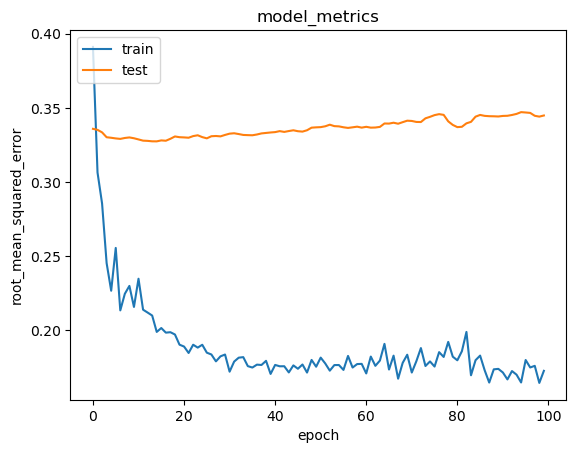

In [18]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Recommendation

In [43]:
hotel_df = hotel_new
df = pd.read_csv(f'{DATA_PATH}/hotel_rating.csv')

hotel_user_id = df.Hotel_User_Id.sample(1).iloc[0]
hotel_visited_by_user = df[df.Hotel_User_Id == hotel_user_id]

hotel_not_visited = hotel_df[~hotel_df['hotel_id'].isin(hotel_visited_by_user['Hotel_Id'].values)]['hotel_id'] 
hotel_not_visited = list(
    set(hotel_not_visited)
    .intersection(set(hotel_to_hotel_encoded.keys()))
)
 
hotel_not_visited = [[hotel_to_hotel_encoded.get(x)] for x in hotel_not_visited]
user_encoder = user_to_user_encoded.get(hotel_user_id)
user_hotel_array = np.hstack(
    ([[user_encoder]] * len(hotel_not_visited), hotel_not_visited)
)

In [44]:
ratings = model.predict(user_hotel_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_hotel_ids = [
    hotel_encoded_to_hotel.get(hotel_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(hotel_user_id))
print('===' * 9)
print('Hotel with high ratings from user')
print('----' * 8)
 
top_hotel_user = (
    hotel_visited_by_user.sort_values(
        by = 'Hotel_User_Rating',
        ascending=False
    )
    .head(5)
    .Hotel_Id.values
)
 
hotel_df_rows = hotel_df[hotel_df['hotel_id'].isin(top_hotel_user)]
pd.DataFrame(hotel_df_rows)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Showing recommendations for users: 14855
Hotel with high ratings from user
--------------------------------


,hotel_id,hotel_name,hotel_star,hotel_descriptions,hotel_city,hotel_city_star
16,6492,Grand Vista Hanoi,5,Khách sạn sẽ cung cấp cho khách các phòng có đ...,Hà Nội,Hà Nội 5
25,9374,Ancient Paradise Hotel,3,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,Hà Nội 3
26,6328,Thang Long Opera Hotel Hanoi,4,Thang Long Opera Hotel cung cấp chỗ nghỉ tại t...,Hà Nội,Hà Nội 4


In [45]:
print('----' * 8)
print('Top 10 hotel recommendation')
print('----' * 8)
 
recommended_hotel = hotel_df[hotel_df['hotel_id'].isin(recommended_hotel_ids)]
recommended_hotel

--------------------------------
Top 10 hotel recommendation
--------------------------------


,hotel_id,hotel_name,hotel_star,hotel_descriptions,hotel_city,hotel_city_star
1,8101,TK123 Hanoi Hotel,3,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,Hà Nội 3
3,8897,Le Jardin Hotel Haute Couture,4,Le Jardin Hotel Haute Couture có tầm nhìn ra t...,Hà Nội,Hà Nội 4
4,6311,Sunway Hotel,4,Khách sạn có phòng tập thể dục với trang thiết...,Hà Nội,Hà Nội 4
7,8169,Classy Boutique Hotel,3,Classy Boutique Hotel với vị trí thuận lợi nằm...,Hà Nội,Hà Nội 3
12,7509,Hanoi La Selva Central Hotel & Spa,4,Nằm tại vị trí thuận tiện ở trung tâm Hà Nội...,Hà Nội,Hà Nội 4
15,8959,SOJO Hotel Ga Hanoi,4,"Nằm tại vị trí thuận tiện ở Hà Nội, SOJO Hot...",Hà Nội,Hà Nội 4
19,8012,Grand Cititel Hanoi Hotel & Spa,4,"Tọa lạc tại quận Hoàn Kiếm ở thành phố Hà Nội,...",Hà Nội,Hà Nội 4
21,8246,Hotel De Rond Hanoi,4,Khách sạn cung cấp cho khách các phòng có điều...,Hà Nội,Hà Nội 4
23,8160,Nesta - The Grand Hao Nam,4,Căn hộ có ban công nơi khách có thể nhìn ra kh...,Hà Nội,Hà Nội 4
24,6587,Little Charm Hanoi Hostel,3,Tất cả các phòng đều được trang bị tủ khóa và ...,Hà Nội,Hà Nội 3


## Evaluate